In [1]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

car_data = pd.read_csv('../Documents/data_set/Main_User_Interface/1.14MHz Data/Features/car.csv')
human_data = pd.read_csv('../Documents/data_set/Main_User_Interface/1.14MHz Data/Features/human.csv')
pillar_data = pd.read_csv('../Documents/data_set/Main_User_Interface/1.14MHz Data/Features/pillar.csv')
wall_data = pd.read_csv('../Documents/data_set/Main_User_Interface/1.14MHz Data/Features/wall.csv')

Using TensorFlow backend.


In [2]:
print('Car:', len(car_data))
print('Human:', len(human_data))
print('Pillar:', len(pillar_data))
print('Wall:', len(wall_data))
total = len(car_data) + len(human_data) + len(pillar_data) + len(wall_data)
print('Total data:', total)

Car: 7640
Human: 9791
Pillar: 5791
Wall: 5506
Total data: 28728


In [3]:
human = human_data.loc[human_data['type'] == 'HUMAN'].iloc[:,4:]
car = car_data.loc[car_data['type'] == 'CAR'].iloc[:,4:]
pillar = pillar_data.loc[pillar_data['type'] == 'PILLAR'].iloc[:,4:]
wall = wall_data.loc[wall_data['type'] == 'WALL'].iloc[:,4:]

In [4]:
human_label = ['HUMAN']*human.shape[0]
car_label = ['CAR']*car.shape[0]
wall_label = ['WALL']*wall.shape[0]
pillar_label = ['PILLAR']*pillar.shape[0]
non_human_label = ['NON_HUMAN']*(car.shape[0] +wall.shape[0] + pillar.shape[0])

In [5]:
# X_human_train, X_human_test, y_human_train, y_human_test = train_test_split(human.values, ['HUMAN']*human.shape[0], test_size=0.2, random_state=42)
# X_car_train, X_car_test, y_car_train, y_car_test = train_test_split(car.values, ['CAR']*car.shape[0], test_size=0.2, random_state=42)
# X_wall_train, X_wall_test, y_wall_train, y_wall_test = train_test_split(wall.values, ['WALL']*wall.shape[0], test_size=0.2, random_state=42)
# X_pillar_train, X_pillar_test, y_pillar_train, y_pillar_test = train_test_split(pillar.values, ['PILLAR']*pillar.shape[0], test_size=0.2, random_state=42)

label = human_label + non_human_label
data = human.values.tolist() + car.values.tolist() + wall.values.tolist() + pillar.values.tolist()


from sklearn.preprocessing import LabelBinarizer, LabelEncoder
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(label)

train_X, test_X, train_y, test_y = train_test_split(data, label_encoded, test_size=0.33, random_state=42)

In [6]:
print('X train data:', np.array(train_X).shape)
print('X test data:', np.array(test_X).shape)
print('y train data:', np.array(train_y).shape)
print('y test data:', np.array(test_y).shape)

X train data: (19247, 36)
X test data: (9481, 36)
y train data: (19247,)
y test data: (9481,)


In [7]:
from sklearn import preprocessing
normalized_X_train = preprocessing.normalize(train_X)
normalized_X_test = preprocessing.normalize(test_X)

In [8]:
train_X = np.array(normalized_X_train)[:,6:31].reshape(-1,5,5,1)
test_X =  np.array(normalized_X_test)[:,6:31].reshape(-1,5,5,1)

train_X.shape, test_X.shape

((19247, 5, 5, 1), (9481, 5, 5, 1))

In [9]:
classes = np.unique(train_y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  2
Output classes :  [0 1]


In [10]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_X.shape, test_X.shape, train_y.shape, test_y.shape

((19247, 5, 5, 1), (9481, 5, 5, 1), (19247,), (9481,))

In [11]:
from keras.utils import to_categorical

# Change the labels from categorical to one-hot encoding
train_Y_one_hot = keras.utils.to_categorical(train_y)
test_Y_one_hot = keras.utils.to_categorical(test_y)

# Display the change for category label using one-hot encoding
print('Original label:', train_y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

print(train_Y_one_hot.shape)
print(test_Y_one_hot.shape)

Original label: 1
After conversion to one-hot: [0. 1.]
(19247, 2)
(9481, 2)


In [12]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.3, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((13472, 5, 5, 1), (5775, 5, 5, 1), (13472, 2), (5775, 2))

In [13]:
from keras.models import Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

epochs = 50
num_classes = 2

model = Sequential()

model.add(Conv2D(128, kernel_size=(2, 2),input_shape=(5,5,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2),padding='same'))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
# import keras
# from keras.models import Sequential,Input,Model
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D

# epochs = 50
# num_classes = 2

# model = Sequential()

# model.add(Conv2D(128, kernel_size=(2, 2),activation='linear',input_shape=(5,5,1)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D((2, 2),padding='same'))

# #model.add(Conv2D(64, (2, 2), activation='linear',padding='same'))
# #model.add(Activation('relu'))
# #model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

# model.add(Flatten())
# #model.add(Activation('relu'))
# model.add(Dense(num_classes, activation='softmax'))

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# #model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 4, 4, 128)         640       
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 128)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 1,666
Trainable params: 1,666
Non-trainable params: 0
_________________________________________________________________


In [16]:
train_dropout = model.fit(train_X, train_label,epochs=epochs,validation_data=(valid_X, valid_label))

Train on 13472 samples, validate on 5775 samples
Epoch 1/50
13472/13472 [==============================] - 4s 314us/step - loss: 0.6208 - accuracy: 0.6619 - val_loss: 0.5872 - val_accuracy: 0.6686
Epoch 2/50
13472/13472 [==============================] - 3s 193us/step - loss: 0.5473 - accuracy: 0.7147 - val_loss: 0.5159 - val_accuracy: 0.7294
Epoch 3/50
13472/13472 [==============================] - 2s 155us/step - loss: 0.4841 - accuracy: 0.7776 - val_loss: 0.4594 - val_accuracy: 0.8081
Epoch 4/50
13472/13472 [==============================] - 2s 171us/step - loss: 0.4344 - accuracy: 0.8142 - val_loss: 0.4160 - val_accuracy: 0.8319
Epoch 5/50
13472/13472 [==============================] - 2s 185us/step - loss: 0.3981 - accuracy: 0.8373 - val_loss: 0.3904 - val_accuracy: 0.8332
Epoch 6/50
13472/13472 [==============================] - 3s 213us/step - loss: 0.3672 - accuracy: 0.8564 - val_loss: 0.3588 - val_accuracy: 0.8526
Epoch 7/50
13472/13472 [==============================] - 2s 17

In [17]:
# model.save("CNN_model.h5py")

In [18]:
test_eval = model.evaluate(test_X, test_Y_one_hot)
test_eval

9481/9481 [==============================] - 1s 66us/step


[0.1434818994799642, 0.9490560293197632]

In [19]:
# # serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")

In [20]:
# from keras.models import model_from_json
# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")

# # evaluate loaded model on test data
# loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# score = loaded_model.evaluate(test_X, test_Y_one_hot, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [21]:
predicted_classes = model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_y.shape

((9481,), (9481,))

In [22]:
# correct = np.where(predicted_classes==test_Y)[0]
# print ("Found correct labels", len(correct))
# # for i, correct in enumerate(correct[:9]):
# #     plt.subplot(3,3,i+1)
# #     plt.imshow(test_X[correct].reshape(9,9), cmap='gray', interpolation='none')
# #     plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
# #     plt.tight_layout()

# incorrect = np.where(predicted_classes!=test_Y)[0]
# print ("Found incorrect labels", len(incorrect))
# # for i, incorrect in enumerate(incorrect[:9]):
# #     plt.subplot(3,3,i+1)
# #     plt.imshow(test_X[incorrect].reshape(9,9), cmap='gray', interpolation='none')
# #     plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
# #     plt.tight_layout()

In [23]:
# from sklearn.metrics import classification_report
# num_classes = 2
# target_names = ["Class {}".format(i) for i in range(num_classes)]
# print(classification_report(test_y, predicted_classes, target_names=target_names))

[[2799  426]
 [  57 6199]]
0.9490560067503427


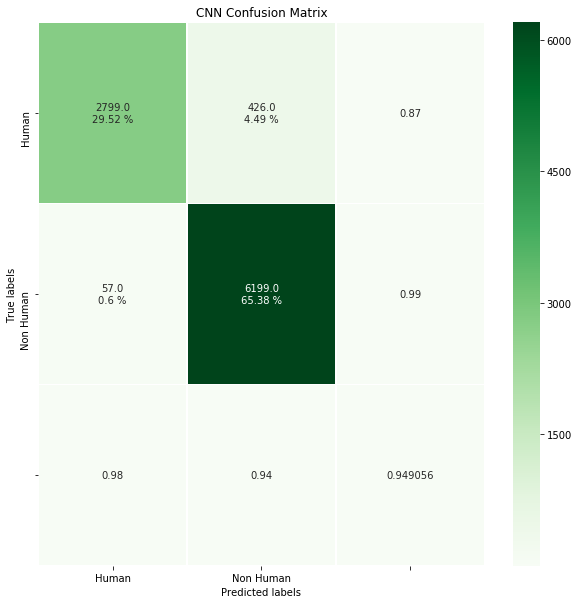

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

def create_confusion_matrix(y_test, result):
    cm = confusion_matrix(y_test, result)
    import seaborn as sns
    import matplotlib.pyplot as plt     
    sum = np.sum(cm)
    score = accuracy_score(y_test, result)
    print(score)
    
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    precision_CLASS_A = round(precision_score(y_test, result, average='binary',pos_label=0),2)
    precision_CLASS_B = round(precision_score(y_test, result, average='binary',pos_label=1),2)
    recall_CLASS_A = round(recall_score(y_test, result, average='binary',pos_label=0),2)
    recall_CLASS_B = round(recall_score(y_test, result, average='binary',pos_label=1),2)
    f1_CLASS_A = round(f1_score(y_test, result, average='binary',pos_label=0),2)
    f1_CLASS_B = round(f1_score(y_test, result, average='binary',pos_label=1),2)
    f1_average = round((f1_CLASS_A + f1_CLASS_B)/2, 2);
#     print('Precision: Class A',precision_CLASS_A)
#     print('Precision: Class B',precision_CLASS_B)
#     print('Recall: Class A',recall_CLASS_A)
#     print('Recall: Class B',recall_CLASS_B)
#     print('F1-Score: Class A',f1_CLASS_A)
#     print('F1-Score: Class B',f1_CLASS_B)
#     print('Average F1-score:', f1_average)
        
    cm_new = np.append(cm[0], recall_CLASS_A)
    cm_new2 = np.append(cm[1], recall_CLASS_B)
    cm_new3 = np.array([precision_CLASS_A, precision_CLASS_B, score])
    cm = np.array([cm_new,cm_new2,cm_new3])
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True, ax = ax,linewidths=.5,fmt='g',cmap="Greens"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('CNN Confusion Matrix'); 
    counter = 0
    for i in range(0,2):
        for j in range(0,3):
            percentage = cm[i,j]/sum
            t = ax.texts[counter]
            if j == 2:
                t.set_text(str(cm[i,j]))
            else:
                t.set_text(str(cm[i,j]) + '\n' + str(round(percentage*100,2)) + " %")
            counter = counter + 1
    labels = ['Human', 'Non Human']
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels);

cm = confusion_matrix(test_y, predicted_classes)
print(cm)
create_confusion_matrix(test_y, predicted_classes)